# Simple egg box toy LogPDF

This LogPDF is based on a 2-dimensional distribution with 4 equal normal modes. Each mode is located in a different quadrant, and separated by a relatively large distance.

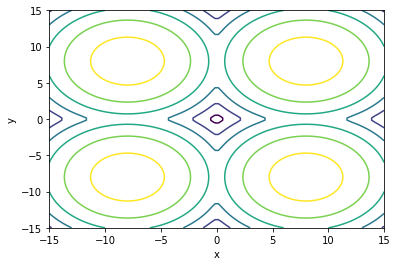

In [1]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create log pdf
sigma = 2
r = 4
log_pdf = pints.toy.SimpleEggBoxLogPDF(sigma, r)

# Contour plot of pdf
levels = np.linspace(-100, 0, 20)
x = np.linspace(-15, 15, 100)
y = np.linspace(-15, 15, 100)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]
plt.contour(X, Y, Z, levels=levels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As an alternative visualisation, we can sample from the underlying distribution directly:

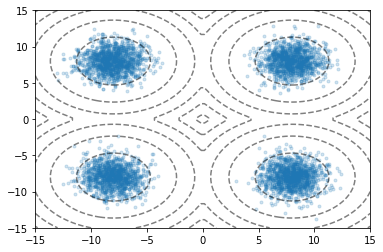

In [2]:
samples = log_pdf.sample(5000)
plt.figure()
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.5)
plt.scatter(samples[:, 0], samples[:, 1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

We now try to sample from the distribution with 3 chains of adaptive covariance MCMC:

In [3]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform(-15, 15, size=(3, 2))
mcmc = pints.MCMCSampling(log_pdf, 3, x0, method=pints.AdaptiveCovarianceMCMC)

# Stop after 6000 iterations
mcmc.set_max_iterations(6000)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

Running...
Done!


We can inspect the convergence of the chains using a trace plot:

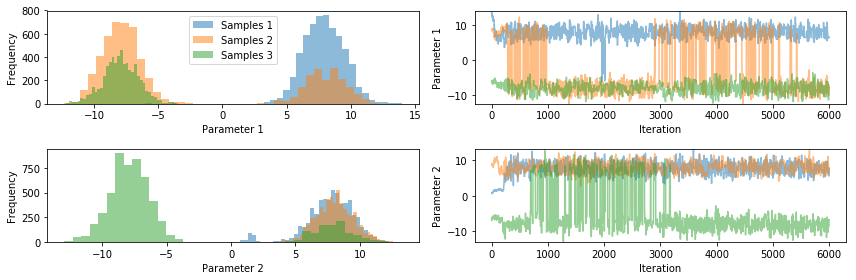

In [4]:
import pints.plot
pints.plot.trace(chains)
plt.show()

We then discard the warm-up, and stack the chains together to create a combined plot. If we're lucky, the chains will have explored different modes:

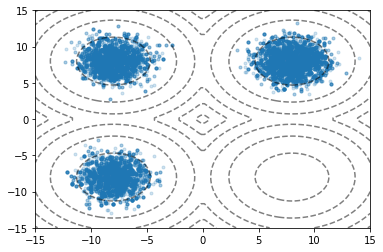

In [5]:
# Discard warm-up
chains = [chain[1000:] for chain in chains]

stacked = np.vstack(chains)
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

We can see that adaptive covariance MCMC doesn't (usually) perform very well on this type of problem at all!

Finally, we can calculate a "quality" score (based on Kullback-Leibler divergence) to assess how well we did on this problem:

In [7]:
print(log_pdf.kl_divergence(stacked))

2220.50836867


We can compare this to the direct sampling method:

In [8]:
print(log_pdf.kl_divergence(samples))

0.0177570318512


Try Hamiltonian Monte Carlo on this problem. Also struggles with the multimodal target.

Running...
Using Hamiltonian MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     63     0.333     0.333     0.333      0:00.0
2     123    0.5       0.5       0.5        0:00.1
3     183    0.6       0.6       0.6        0:00.1
20    1203   0.909     0.909     0.909      0:00.6
40    2403   0.952381  0.929     0.952381   0:01.2
60    3603   0.968     0.952     0.968      0:01.9
80    4803   0.963     0.963     0.976      0:02.5
100   6003   0.971     0.971     0.98       0:03.1
120   7203   0.975     0.975     0.984      0:03.8
140   8403   0.979     0.979     0.986      0:04.4
160   9603   0.981     0.981     0.988      0:05.0
180   10803  0.978022  0.984     0.989011   0:05.7
200   12003  0.980198  0.985     0.990099   0:06.3
220   13203  0.977     0.986     0.986      0:06.9
240   14403  0.979     0.988     0.983      0:07.5
260   15603  0.980916  0.985     0.980916   0:08.1

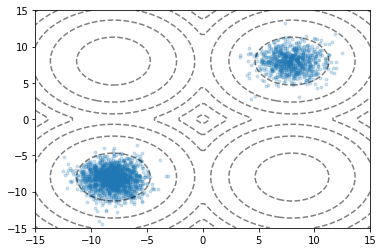

In [19]:
# Create an adaptive covariance MCMC routine
x0 = np.random.uniform(-15, 15, size=(3, 2))
sigma0 = [5, 5]
mcmc = pints.MCMCSampling(log_pdf, 3, x0, method=pints.HamiltonianMCMC, sigma0=sigma0)

# Stop after 6000 iterations
mcmc.set_max_iterations(800)

# Disable logging
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

stacked = np.vstack(chains)
plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()